In [1]:
import os.path
import numpy as np
import pandas as pd

from source.Files_operating import read_dataFile

shtRipper v1.3


In [38]:
interval_path = "data/intervals/"
signal_path = "data/d-alpha/"

filename = "sht44184"
F_ID = filename[-5:]

if os.path.isfile(f"data/intervals/df/{F_ID}_data.csv"):
    df = pd.read_csv(f"data/intervals/df/{F_ID}_data.csv", sep=",")
else:
    df = read_dataFile(interval_path + filename + "_exportGlobus2.dat", F_ID)
    df["ch1_marked"] = pd.Series([0] * df.shape[0])
    df["ch1_ai_marked"] = pd.Series([0] * df.shape[0])

df.describe()

,t,ch1,ch1_marked,ch1_ai_marked
count,65970.000000,65970.000000,65970.00000,65970.000000
mean,197.454500,0.552893,0.31246,0.184660
std,19.044043,0.186984,0.46350,0.388024
min,164.470000,0.191710,0.00000,0.000000
25%,180.962250,0.401320,0.00000,0.000000
50%,197.454500,0.534240,0.00000,0.000000
75%,213.946750,0.674820,1.00000,0.000000
max,230.439000,1.536200,1.00000,1.000000


In [31]:
def normalise_series(data: np.array) -> np.array:
    max_point, min_point, median_value = data.max(), data.min(), np.median(data)
    return (data - median_value) / abs(max_point - min_point)

def get_boards(data: np.array, scale=np.exp(1)):
    loc_max_ind = np.argmax(data)
    dist_ind = np.argsort(np.abs(data - data[loc_max_ind] / scale))
    # print(data)
    return [dist_ind[dist_ind <= loc_max_ind][0], dist_ind[dist_ind >= loc_max_ind][0]]

def process_fragments(data: np.array, mark_data: np.array, edge=10, scale=np.exp(1), step_out=10) -> np.array:
    # edge = 50

    start_ind = 0
    end_ind = 1
    f_fragment = False

    while end_ind < mark_data.shape[0]:
        if mark_data[end_ind] == 1.0:
            if not f_fragment:
                f_fragment = True
        elif f_fragment:
            print(start_ind, end_ind)
            mark_data[start_ind: end_ind] = 0.0
            if end_ind - start_ind > edge:
                boards = get_boards(data[start_ind: end_ind], scale)
                print(boards)
                boards[0] = max(boards[0] + start_ind - step_out, 0)
                boards[1] = min(boards[1] + start_ind + step_out, mark_data.shape[0])

                mark_data[boards[0]:boards[1]] = 1.0
            
            f_fragment = False
            start_ind = end_ind
        elif not f_fragment:
            start_ind = end_ind
            
        end_ind += 1

    return mark_data

In [32]:
# from source.NN_environment import process_fragments

df["ch1_ai_marked"] = process_fragments(np.array(df["ch1"]), np.array(df["ch1_marked"]), scale=1.5)
df.describe()

0 301
[72, 171]
349 526
[54, 165]
624 776
[44, 151]
776 785
924 1076
[45, 145]
1076 1079
1079 1251
[26, 129]
2149 2301
[1, 151]
2301 2310
2399 2651
[15, 139]
2724 3001
[36, 172]
3099 3351
[41, 124]
3549 3826
[7, 142]
4549 4726
[53, 168]
4774 4951
[1, 147]
4999 5201
[31, 163]
5449 5601
[24, 111]
5674 5951
[44, 167]
6049 6251
[28, 132]
6474 6751
[36, 127]
6799 7051
[90, 179]
7174 7326
[25, 100]
13199 13501
[44, 171]
13624 13851
[72, 165]
15824 16251
[31, 217]
16649 16901
[27, 131]
17099 17251
[33, 115]
19499 19701
[39, 166]
20199 20501
[59, 169]
22449 22751
[30, 254]
23074 23351
[51, 150]
23799 24051
[44, 124]
24199 24401
[49, 148]
24649 24901
[45, 215]
25124 25376
[41, 176]
25524 25851
[32, 168]
26349 26551
[23, 93]
26974 27201
[37, 111]
27549 27751
[36, 114]
28599 28901
[2, 140]
29449 29701
[51, 130]
30324 30651
[34, 210]
30924 31126
[31, 122]
31249 31551
[36, 296]
31551 31555
31824 32001
[19, 88]
32374 32701
[56, 238]
33274 33501
[45, 116]
33949 34126
[29, 109]
34149 34601
[39, 265]
3

,t,ch1,ch1_marked,ch1_ai_marked
count,65970.000000,65970.000000,65970.00000,65970.000000
mean,197.454500,0.552893,0.31246,0.184660
std,19.044043,0.186984,0.46350,0.388024
min,164.470000,0.191710,0.00000,0.000000
25%,180.962250,0.401320,0.00000,0.000000
50%,197.454500,0.534240,0.00000,0.000000
75%,213.946750,0.674820,1.00000,0.000000
max,230.439000,1.536200,1.00000,1.000000


In [40]:
df["ch1_marked"] = df["ch1_ai_marked"]
df["ch1_ai_marked"] = 0

Input marking mode (0 - manual | 1 - semiauto):  1
Input start index [0:65000]:  37750


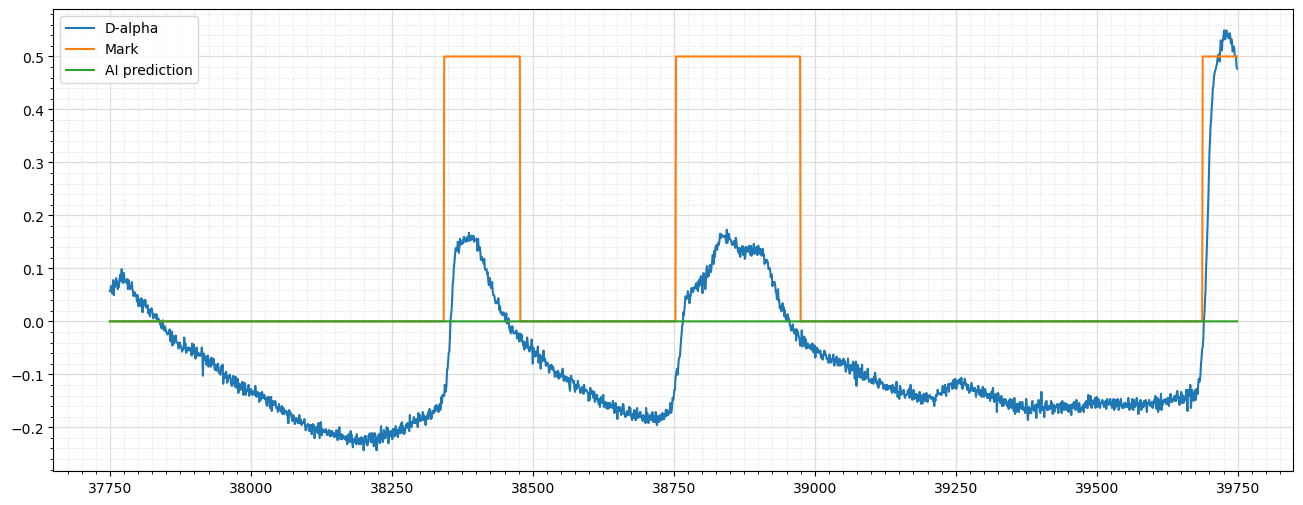

Input index pairs of ELM fragments:
 38700 39000
Input 1 or 0 to set:  0


<Figure size 640x480 with 0 Axes>

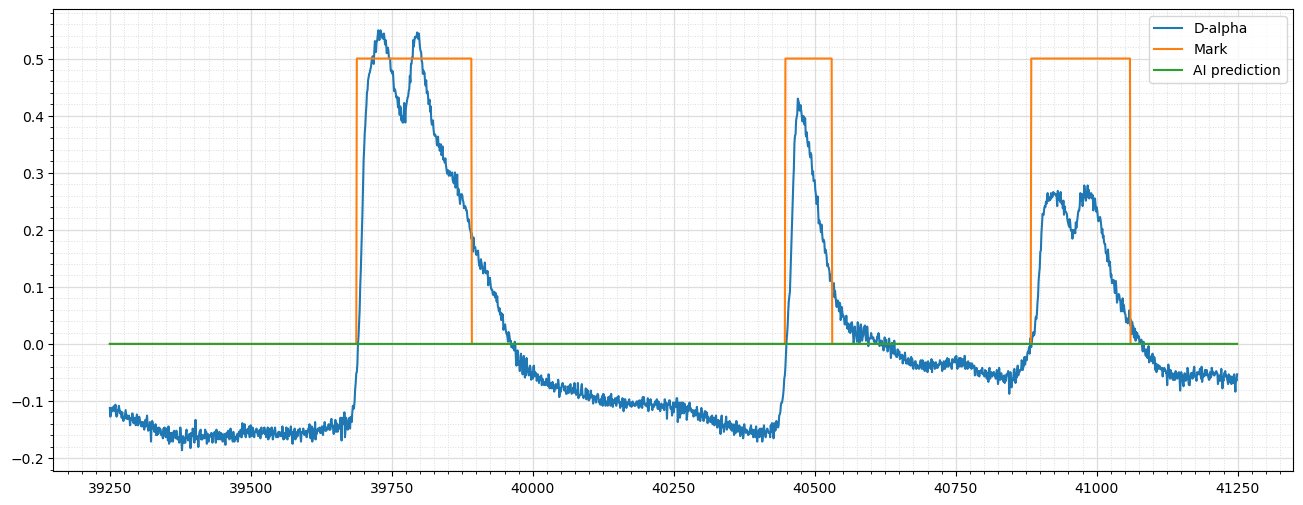

Input index pairs of ELM fragments:
 39850 40000 40750 41100
Input 1 or 0 to set:  0
Input 1 or 0 to set:  0


<Figure size 640x480 with 0 Axes>

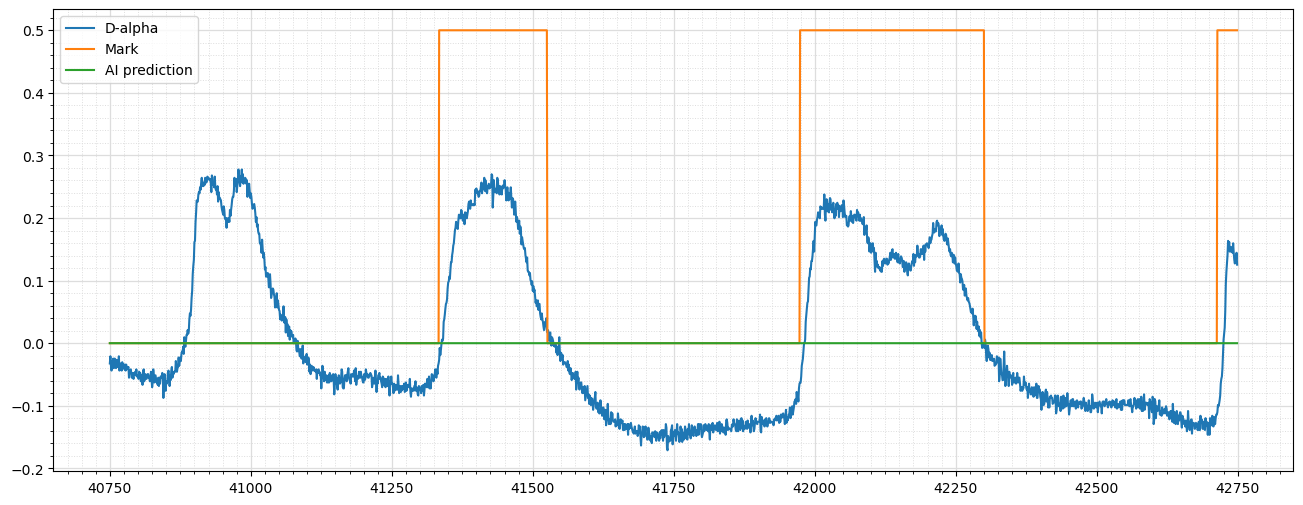

Input index pairs of ELM fragments:
 41250 41600 41900 42350
Input 1 or 0 to set:  0
Input 1 or 0 to set:  0


<Figure size 640x480 with 0 Axes>

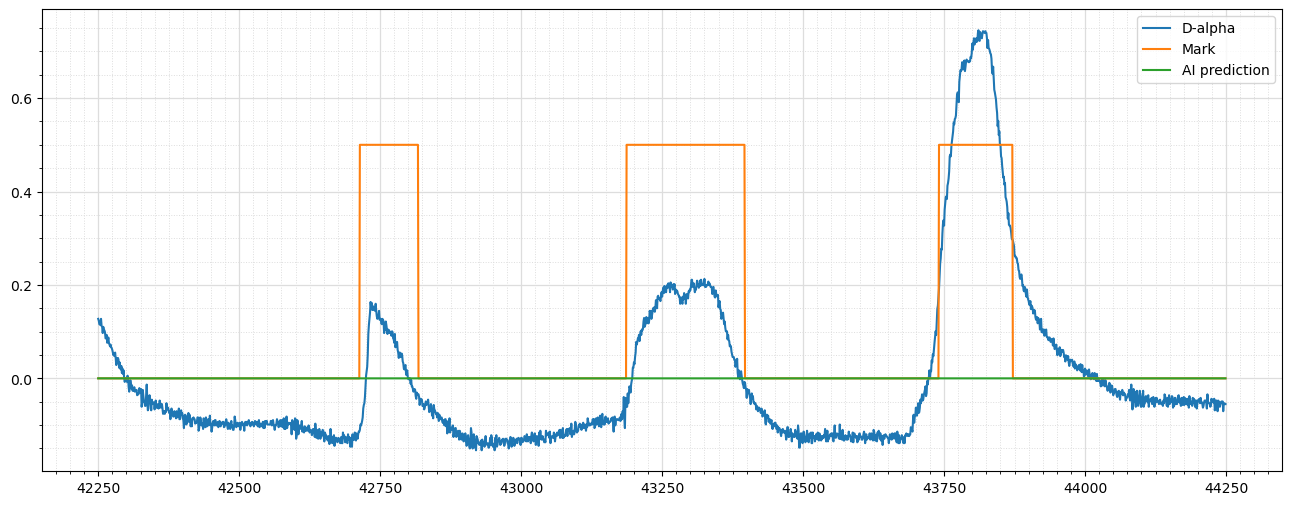

Input index pairs of ELM fragments:
 42500 43500
Input 1 or 0 to set:  0


<Figure size 640x480 with 0 Axes>

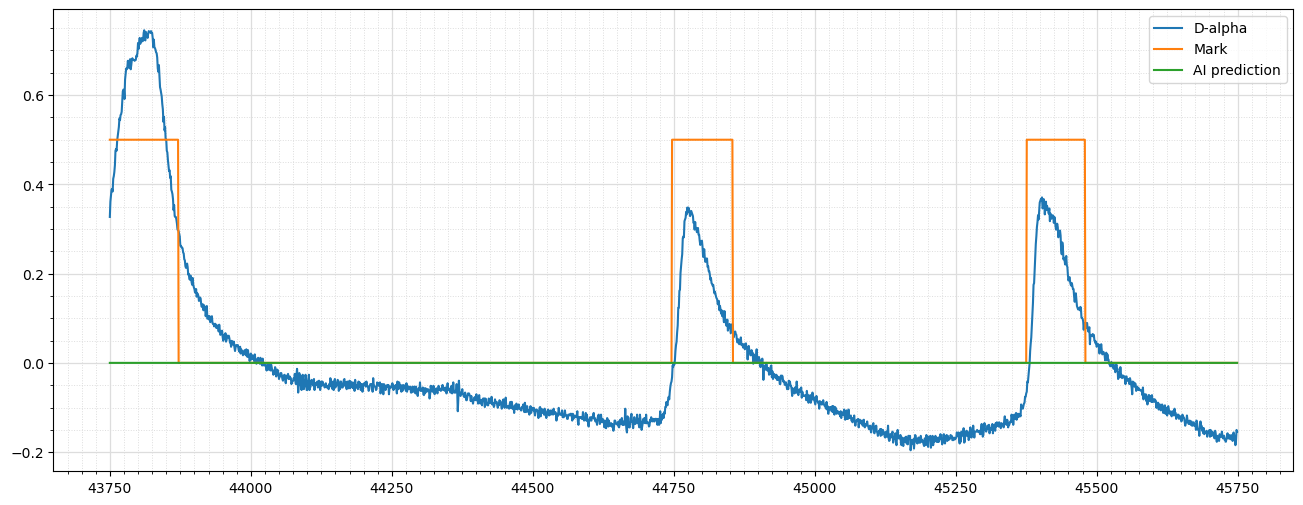

Input index pairs of ELM fragments:
 44825 45000 45450 45500
Input 1 or 0 to set:  0
Input 1 or 0 to set:  0


<Figure size 640x480 with 0 Axes>

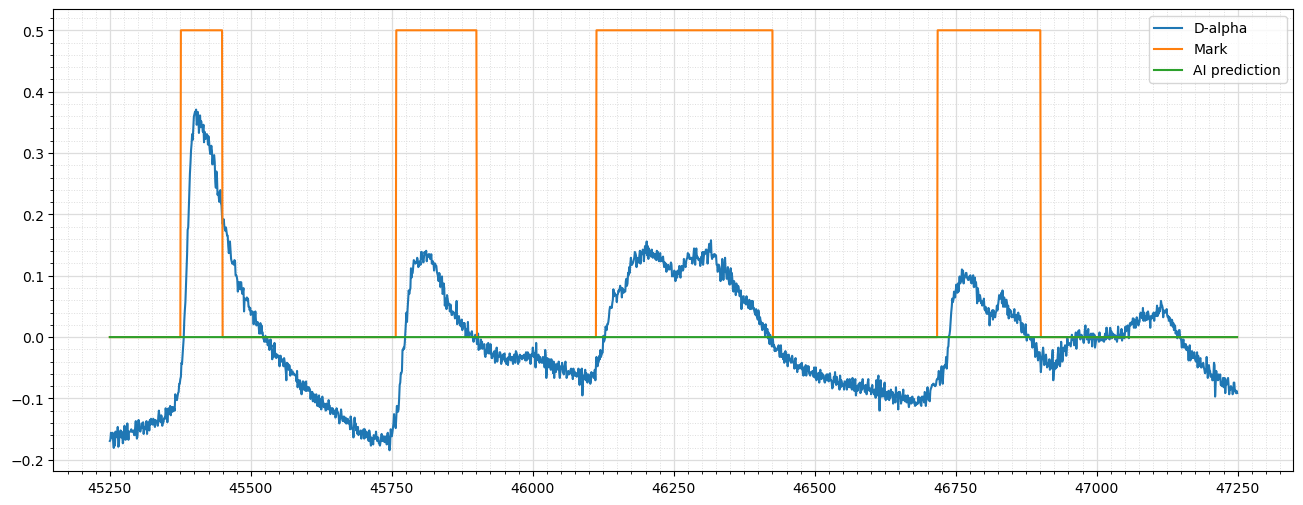

Input index pairs of ELM fragments:
 45850 47000
Input 1 or 0 to set:  0


<Figure size 640x480 with 0 Axes>

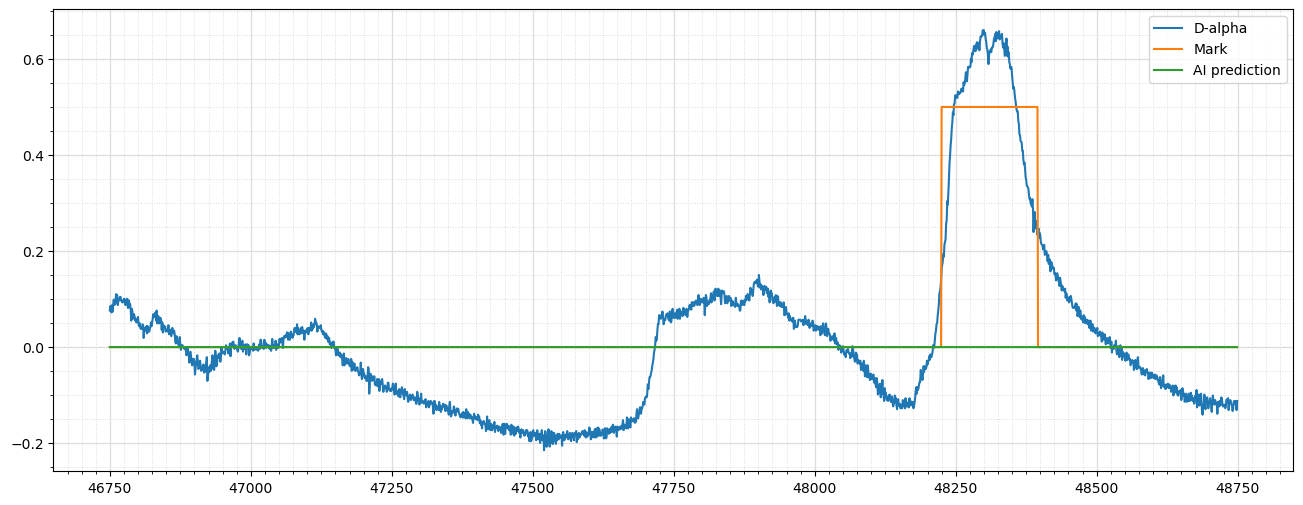

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

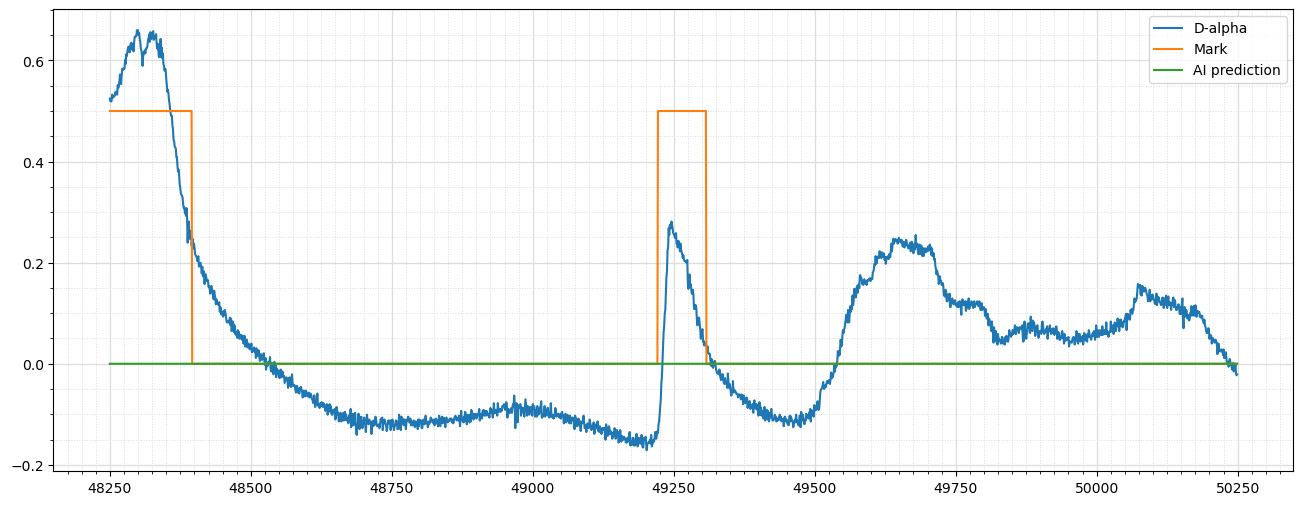

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

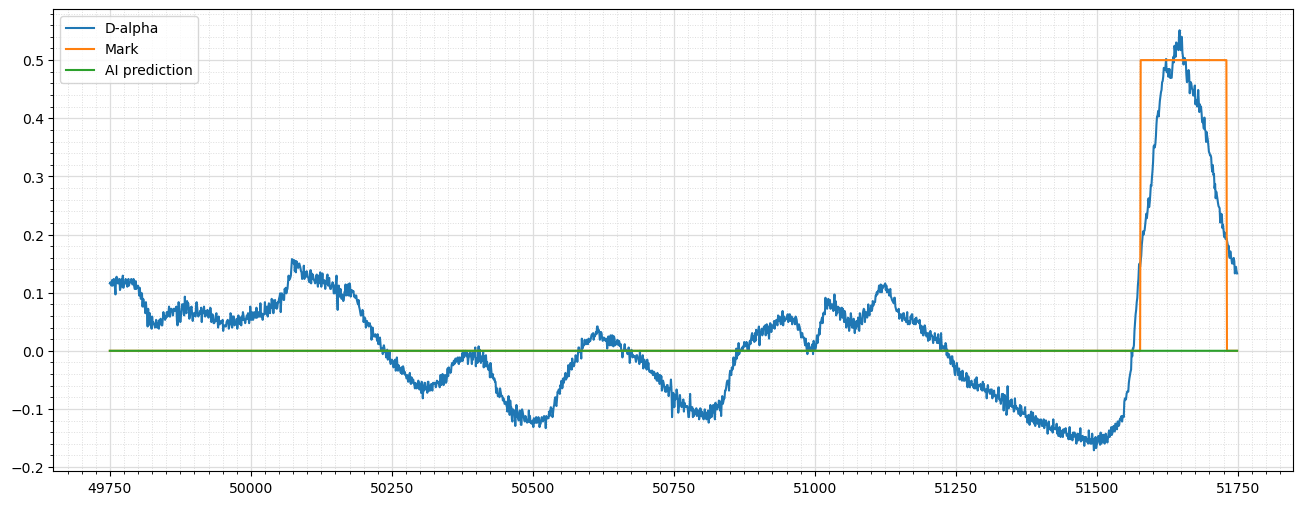

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

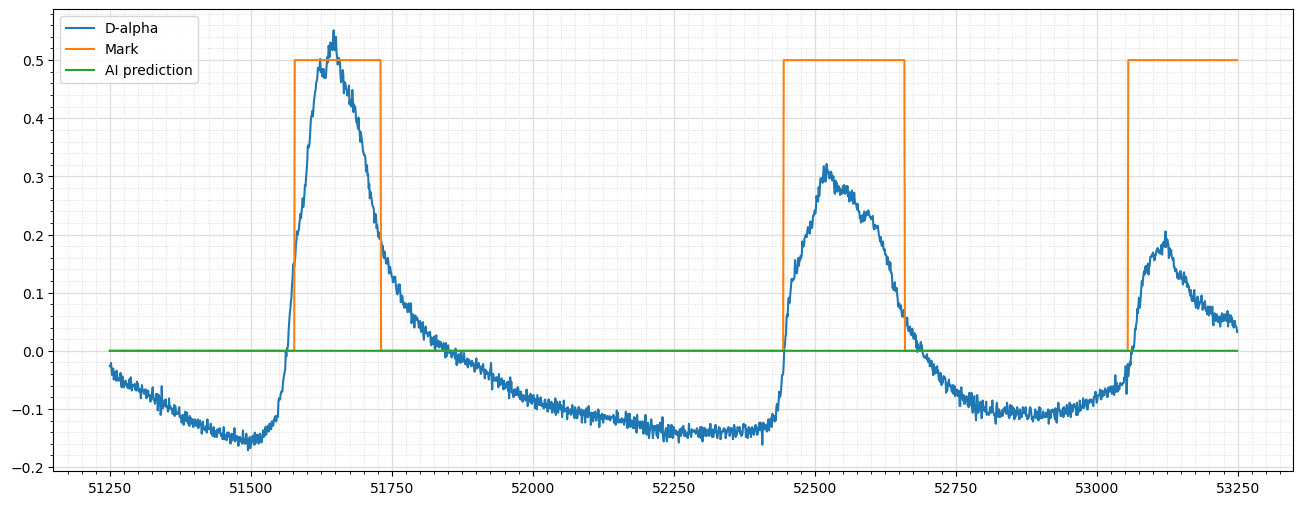

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

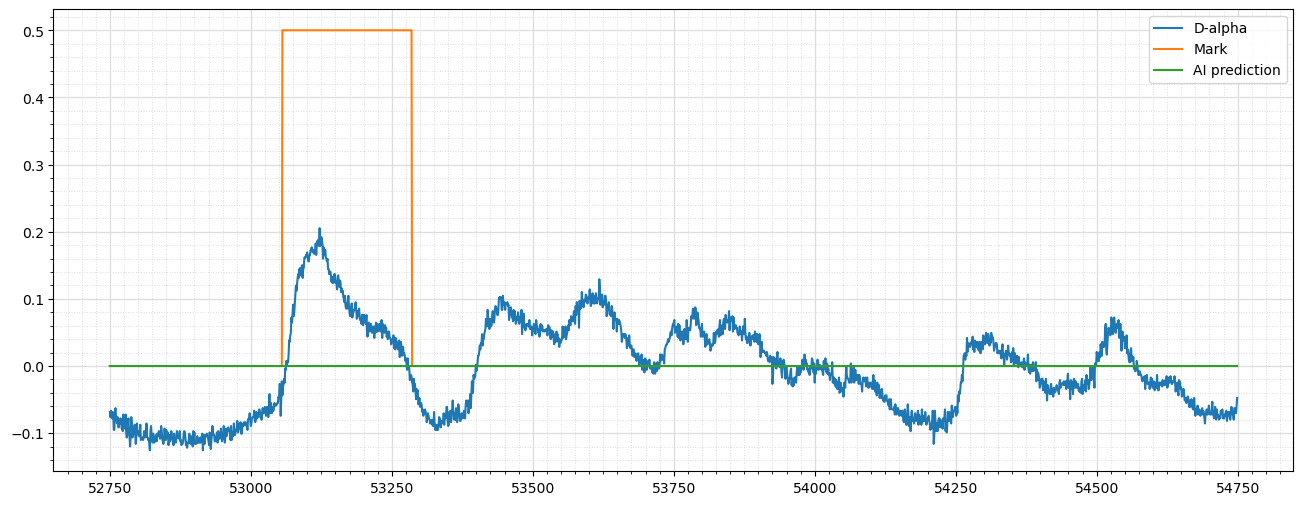

Input index pairs of ELM fragments:
 53000 53500
Input 1 or 0 to set:  0


<Figure size 640x480 with 0 Axes>

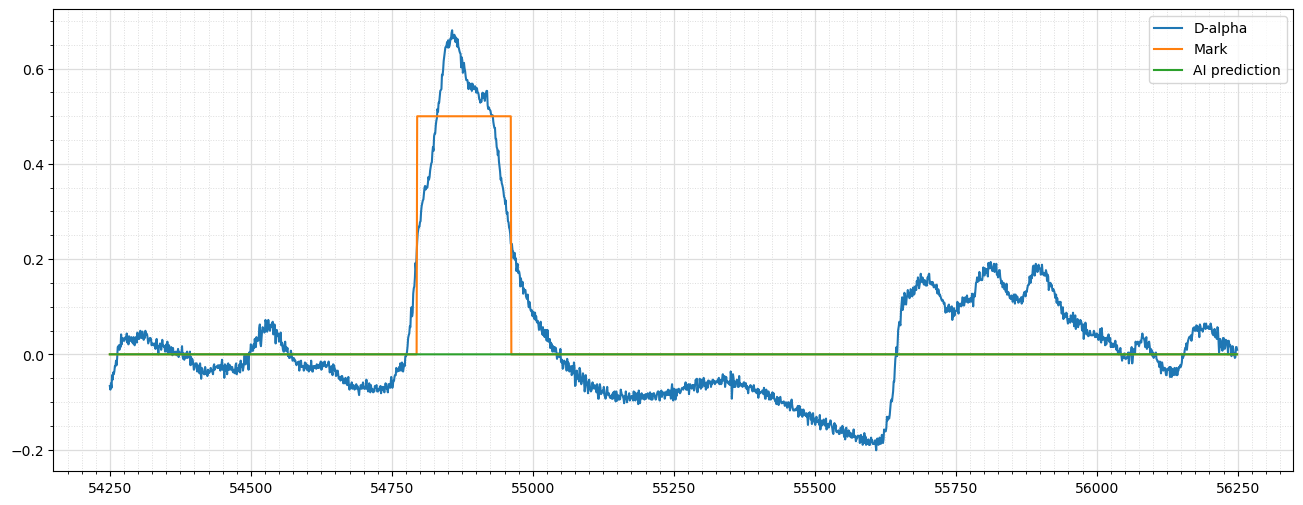

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

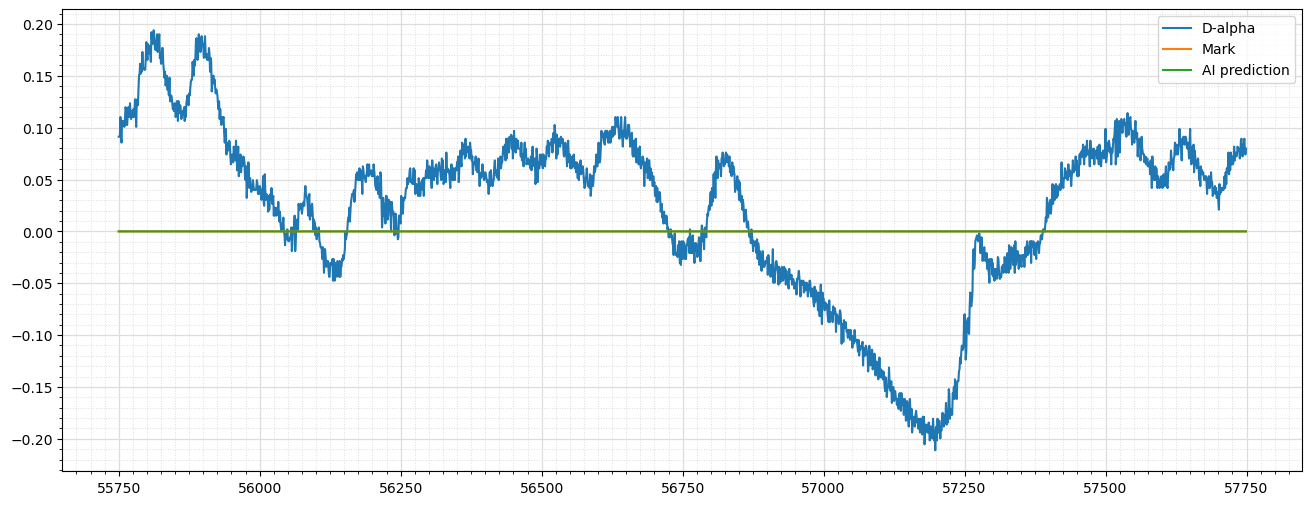

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

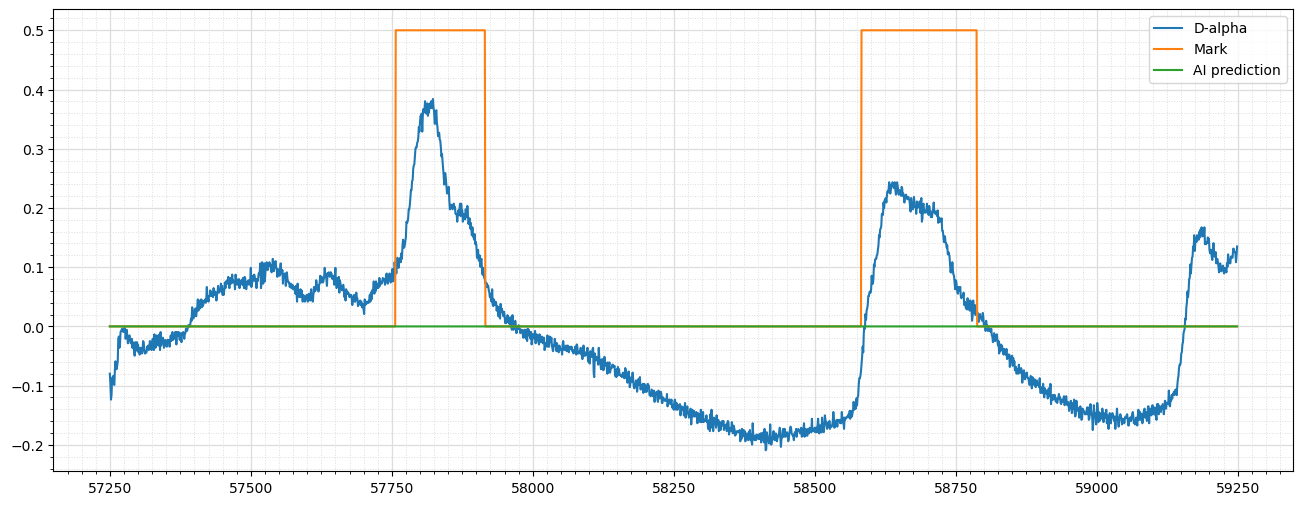

Input index pairs of ELM fragments:
 57855 59000
Input 1 or 0 to set:  0


<Figure size 640x480 with 0 Axes>

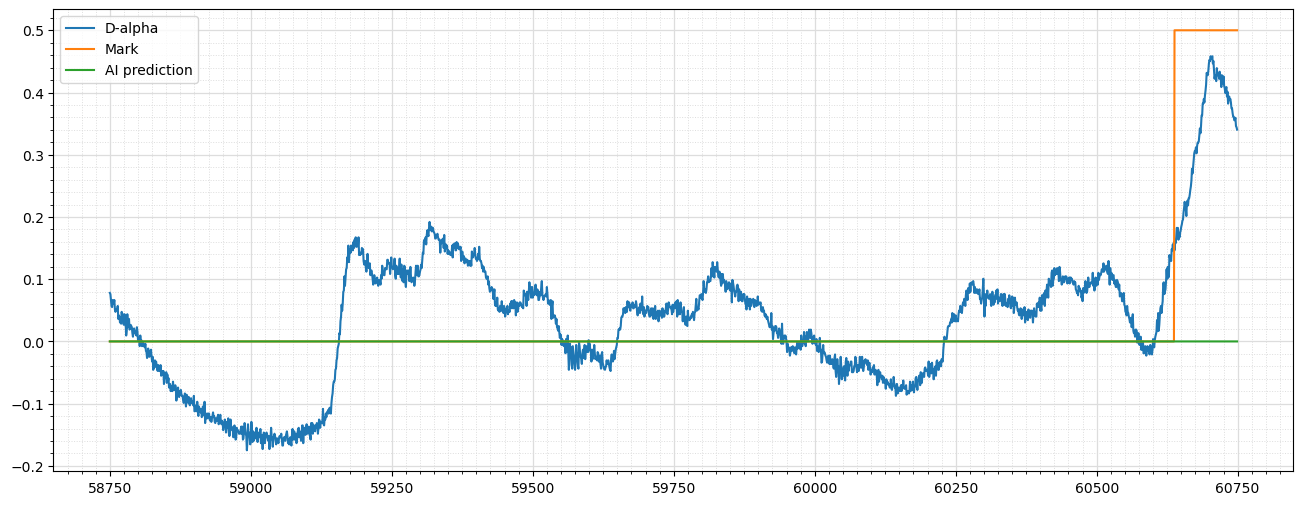

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

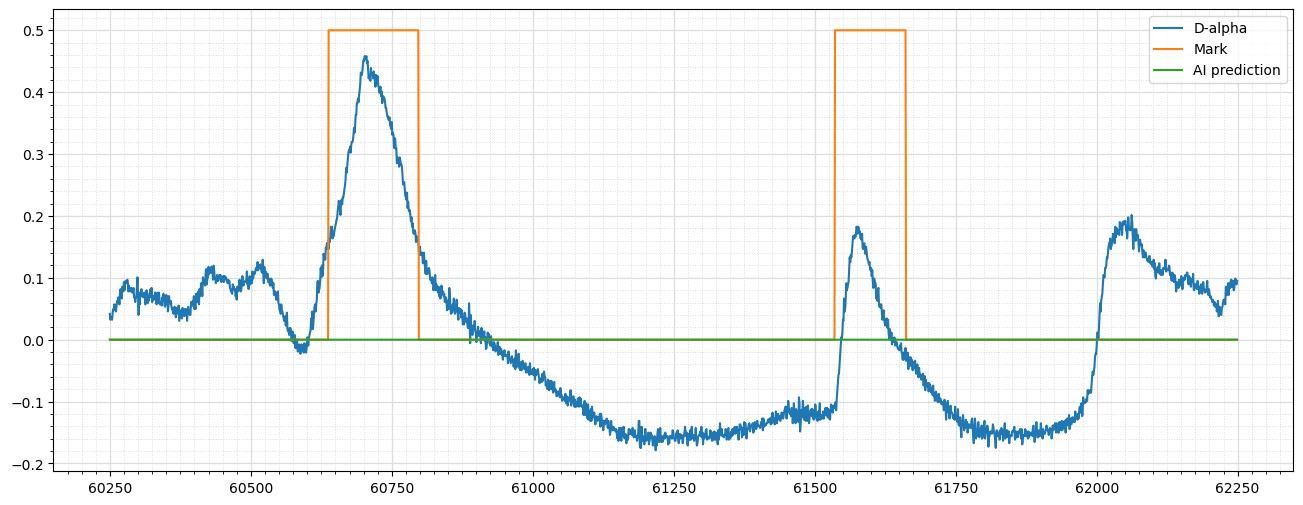

Input index pairs of ELM fragments:
 64625 64750


<Figure size 640x480 with 0 Axes>

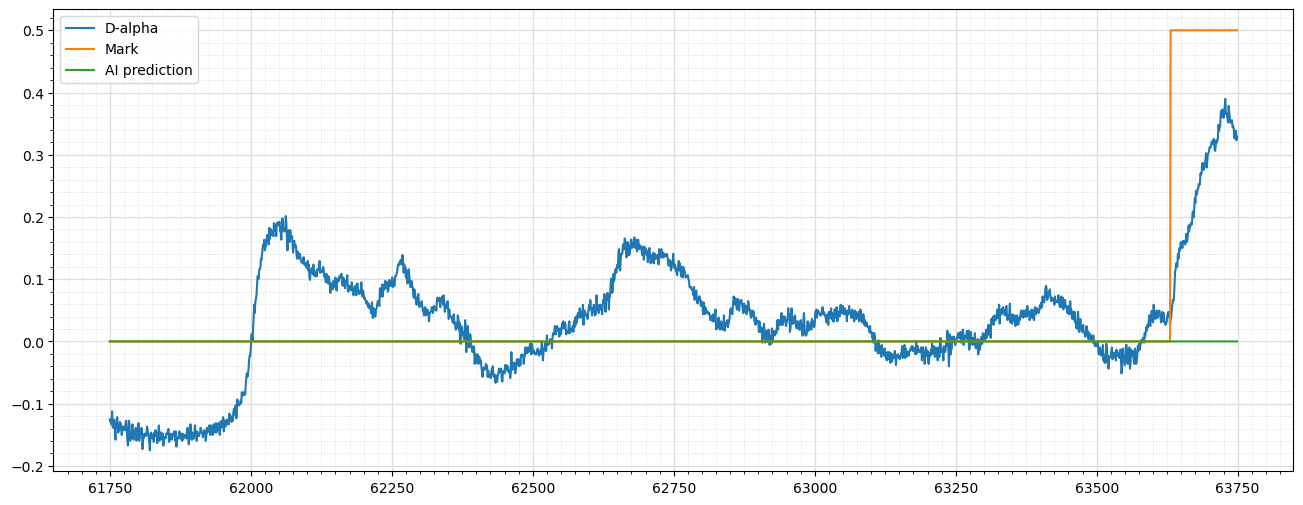

Input index pairs of ELM fragments:
 61625 61750
Input 1 or 0 to set:  0


<Figure size 640x480 with 0 Axes>

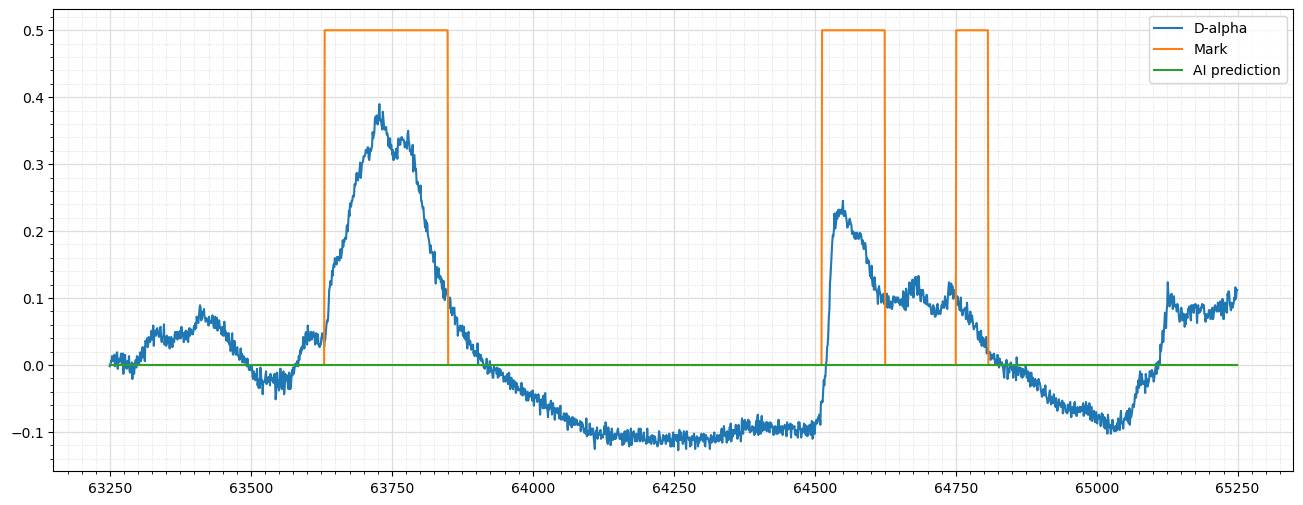

Input index pairs of ELM fragments:
 63500 65000
Input 1 or 0 to set:  0


<Figure size 640x480 with 0 Axes>

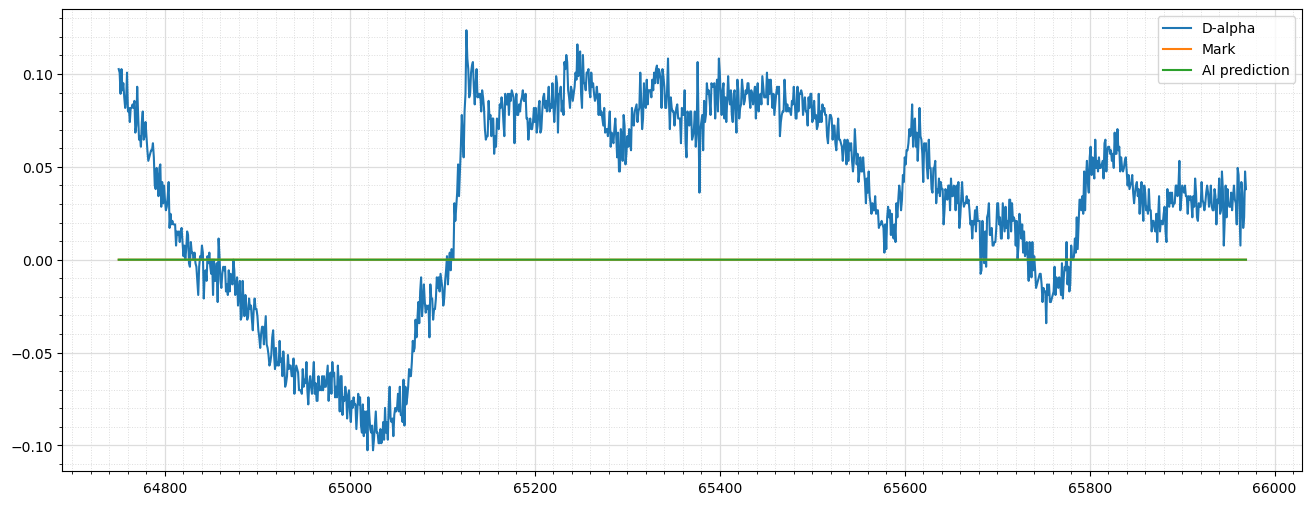

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

In [49]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

mode = int(input("Input marking mode (0 - manual | 1 - semiauto): ").strip().split()[0])

l_edge = int(input(f"Input start index [0:{df.shape[0]//1000*1000}]: ").strip().split()[0])
step = 1500
width = 2000

step_away = 10

while l_edge < df.shape[0]:
    fig, ax = plt.subplots()

    fig.set_figwidth(16)
    fig.set_figheight(6)

    r_edge = min(l_edge + width, df.shape[0])

    ax.plot(range(l_edge, r_edge), normalise_series(df.ch1)[l_edge:r_edge], label="D-alpha")
    ax.plot(range(l_edge, r_edge), df.ch1_marked[l_edge:r_edge] * 0.5, label="Mark")
    ax.plot(range(l_edge, r_edge), df.ch1_ai_marked[l_edge:r_edge] * 0.5, label="AI prediction")

    ax.grid(which='major', color='#DDDDDD', linewidth=0.9)
    ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.7)
    ax.minorticks_on()
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))
    ax.legend()
    plt.show()

    res = list(map(int, input("Input index pairs of ELM fragments:\n").strip().split()))
    for i in range(0, len(res), 2):
        board_ind = [res[i], res[i+1]]
        
        if (df.loc[board_ind[0]:board_ind[1], "ch1_marked"] == 1.).all():
            df.loc[board_ind[0]:board_ind[1], "ch1_marked"] = 0.
        elif (df.loc[board_ind[0]:board_ind[1], "ch1_marked"] == 1.).any():
            if input("Input 1 or 0 to set: ").lower() in ["1", "1.0", "y", "н", "1."]:
                if mode:
                    board_ind = get_boards(df.loc[res[i]:res[i + 1], "ch1"].to_numpy(), scale=1.5)
                    board_ind[0] = max(board_ind[0] - step_away + res[i], 0)
                    board_ind[1] += res[i]
                    
                df.loc[board_ind[0]:board_ind[1], "ch1_marked"] = 1.
            else:
                df.loc[board_ind[0]:board_ind[1], "ch1_marked"] = 0.
        else:
            if mode:
                board_ind = get_boards(df.loc[res[i]:res[i + 1], "ch1"].to_numpy(), scale=1.5)
                board_ind[0] = max(board_ind[0] - step_away + res[i], 0)
                board_ind[1] += res[i]
                
            df.loc[board_ind[0]:board_ind[1], "ch1_marked"] = 1.

    plt.close()
    plt.clf()
    l_edge += step

In [50]:
df.to_csv(f"data/intervals/df/{F_ID}_data.csv", index=False)
df.describe()

,t,ch1,ch1_marked,ch1_ai_marked
count,65970.000000,65970.000000,65970.000000,65970.0
mean,197.454500,0.552893,0.095362,0.0
std,19.044043,0.186984,0.293716,0.0
min,164.470000,0.191710,0.000000,0.0
25%,180.962250,0.401320,0.000000,0.0
50%,197.454500,0.534240,0.000000,0.0
75%,213.946750,0.674820,0.000000,0.0
max,230.439000,1.536200,1.000000,0.0


In [51]:
count = 0
for i in range(df.shape[0]-1):
    if df.iloc[i].ch1_marked == 0 and df.iloc[i+1].ch1_marked == 1:
        count += 1
print(count)

56


---
## AI marking
---

In [36]:
from source.NN_environment import get_prediction_unet

df["ch1_ai_marked"] = get_prediction_unet(df["ch1_marked"].to_numpy(), ckpt_v=1)
df.to_csv(f"data/intervals/df/{F_ID}_data.csv", index=False)
df.describe()

D:\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 76 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
D:\Edu\Lab\D-alpha-instability-search\source\NN_environment.py:8: RuntimeWarning: invalid value encountered in divide
  return (data - median_value) / abs(max_point - min_point)
D:\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)


,t,ch1,ch1_marked,ch1_ai_marked
count,76155.000000,76155.000000,76155.000000,76155.000000
mean,202.723000,0.465146,0.180211,0.338625
std,21.984199,0.183108,0.384366,0.473245
min,164.646000,0.181490,0.000000,0.000000
25%,183.684500,0.334860,0.000000,0.000000
50%,202.723000,0.393650,0.000000,0.000000
75%,221.761500,0.570020,0.000000,1.000000
max,240.800000,1.283200,1.000000,1.000000


---
## Export to SHT
---

In [ ]:
import shtReader_py.shtRipper as shtRipper

to_pack = {
    "D-alpha, chord=50 cm": {
        'comment': 'SHOT: 44194',
        'unit': 'U(V)',
        'tMin': df.t.min(),  # minimum time
        'tMax': df.t.max(),  # maximum time
        'offset': 0.0,  # ADC zero level offset
        'yRes': -0.00255615,  # ADC resolution: 0.0001 Volt per adc bit
        'y': df.ch1.to_list()
    },
    "Mark": {
        'comment': 'ELMs marks (by Belous F. 29.07.2024)',
        'unit': 'U(V)',
        'tMin': df.t.min(),  # minimum time
        'tMax': df.t.max(),  # maximum time
        'offset': 0.0,  # ADC zero level offset
        'yRes': 0.0001,  # ADC resolution: 0.0001 Volt per adc bit
        'y': df.ch1_marked.to_list()
    },
    "AI prediction": {
        'comment': 'Processed NN prediction of ELMs (v3 old + auto-bordering)',
        'unit': 'U(V)',
        'tMin': df.t.min(),  # minimum time
        'tMax': df.t.max(),  # maximum time
        'offset': 0.0,  # ADC zero level offset
        'yRes': 0.0001,  # ADC resolution: 0.0001 Volt per adc bit
        'y': df.ch1_ai_marked.to_list()
    },
}

packed = shtRipper.ripper.write(path="D:/Edu/Lab/D-alpha-instability-search/data/sht/marked/", filename='44194_data.SHT', data=to_pack)